In [1]:
# Refer to path of package
import sys
sys.path.append('/Users/watcharapongwongrattanasirikul/Documents/Git/Jupyter/my_env/lib/python3.8/site-packages')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import StratifiedShuffleSplit

# Check feature importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# Make the model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Report
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv"
df = pd.read_csv(url)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
df.corr()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892,0.009154,-0.022215,-0.023557,-0.000990,-0.005954
Air temperature [K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
Process temperature [K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
Rotational speed [rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
Tool wear [min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
Machine failure,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,0.009154,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,-0.022215,0.137831,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706
PWF,-0.023557,0.003470,-0.003355,0.123018,0.083781,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273


### EDA

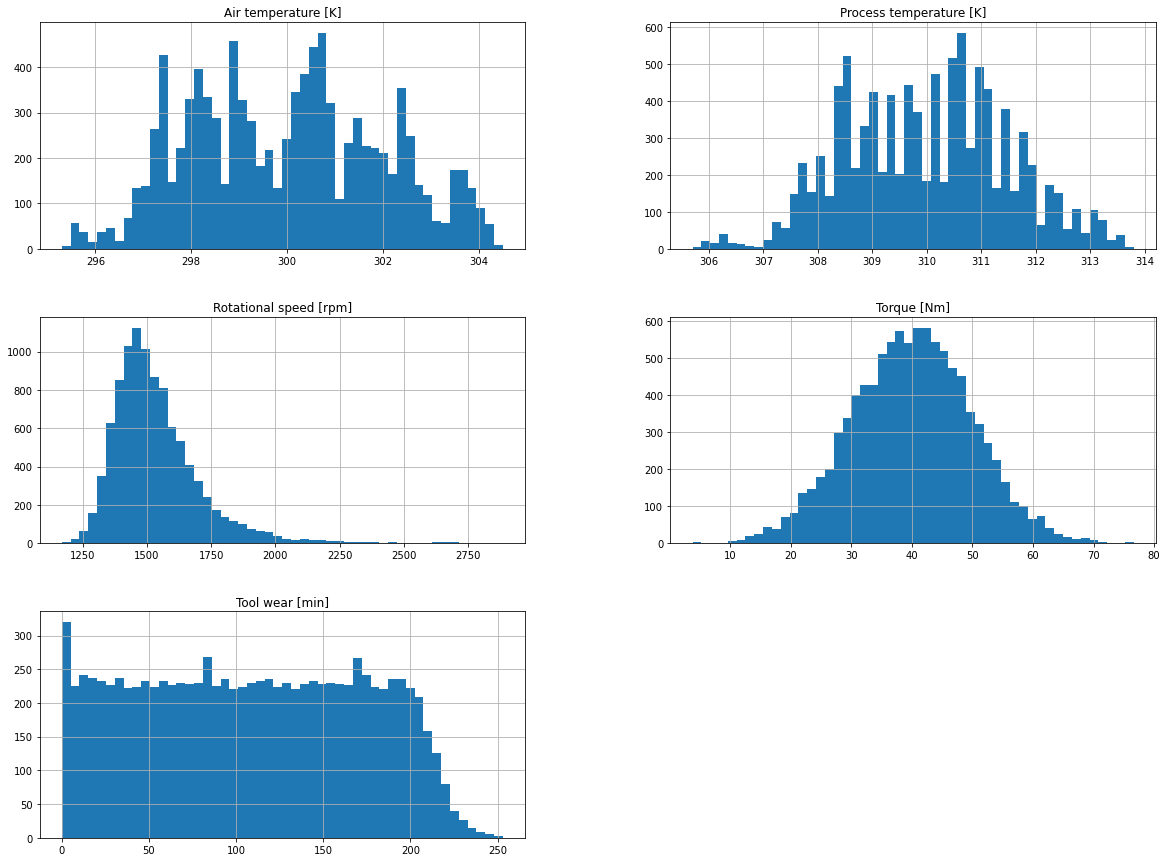

In [6]:
# Check distribution 

df.drop(['Machine failure','UDI', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1).hist(bins=50, figsize=(20,15))
plt.show()

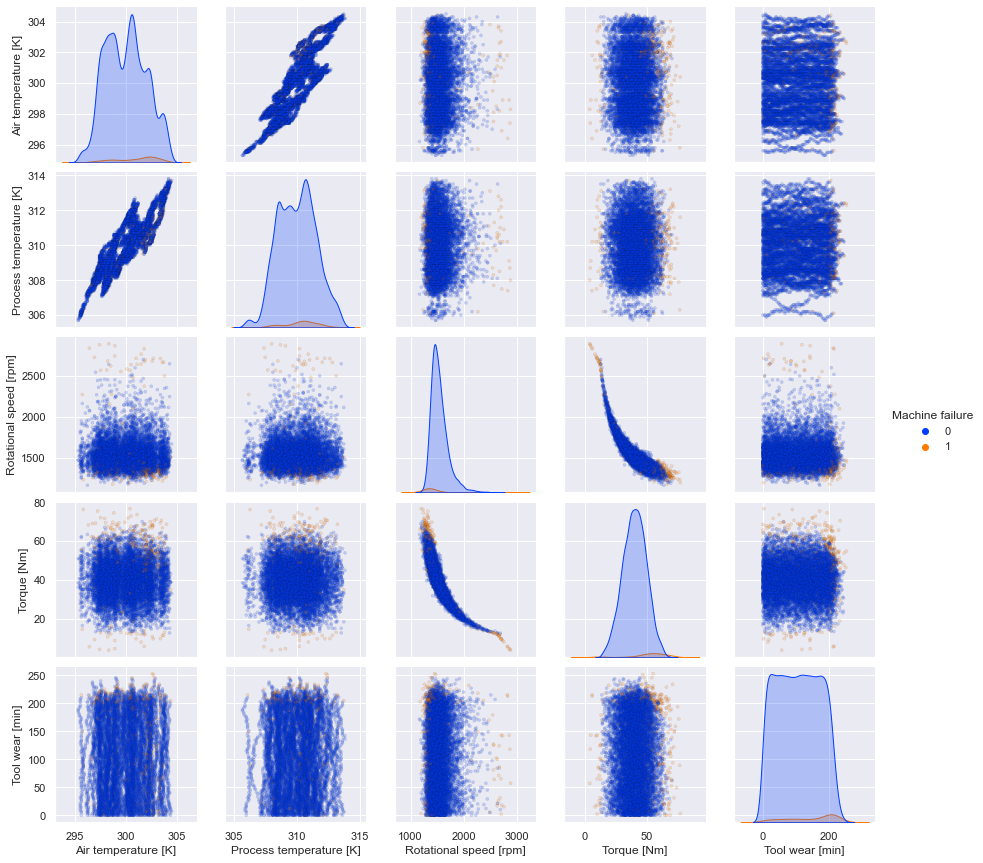

In [7]:
# Pair plot to check the coleration
sns.set(font_scale=1.0)
g = sns.pairplot(data = df.drop(['UDI', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1), hue="Machine failure", plot_kws = {'alpha': 0.2, 's': 10, 'edgecolor': 'k'}, palette="bright")
fig = g.fig 
fig.subplots_adjust(top=0.96, wspace=0.2)

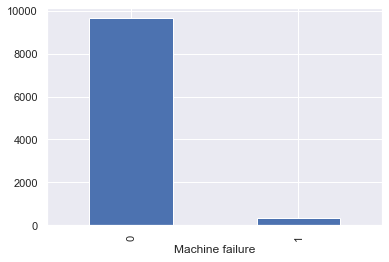

In [8]:
# Check imbalance

df.groupby('Machine failure').size().plot(kind="bar")
plt.show()

# plt.plot(df['Machine failure'])
# plt.show()

### Common function

In [9]:
# Handle imbalance data by specific label data
def handle_imbalance(df, label):
    df_label = df[label]
    df_feature = df.drop([label, 'Product ID', 'Type'], axis=1)
    
    smt=SMOTETomek(random_state=123)
    smt.fit(df_feature, df_label)
    x_smotet, y_smotet = smt.fit_resample(df_feature, df_label)
    df_smotet = pd.concat([pd.DataFrame(data=y_smotet), pd.DataFrame(data=x_smotet)], axis=1, sort=False )
    return df_smotet

In [10]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

def handle_imbalance_ratio(df, label, ration_n, ration_p):

    df_label = df[label]
    df_feature = df.drop([label, 'Product ID', 'Type'], axis=1)
    
    count_class_0 = ration_n
    count_class_1 = ration_p
    
    pipe = make_pipeline(SMOTE(sampling_strategy={1: count_class_1}), NearMiss(sampling_strategy={0: count_class_0}))
    
    x_smt, y_smt = pipe.fit_resample(df_feature, df_label)
    df_smotet = pd.concat([pd.DataFrame(data=y_smt), pd.DataFrame(data=x_smt)], axis=1, sort=False )
    return (df_smotet)

In [11]:
# Split train-test data by specific label
def stratified_train_test_split(df, label):
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
    for train_index, test_index in split.split(df, df[label]):
        train_set = df.loc[train_index]
        test_set = df.loc[test_index]
        return (train_set, test_set)

In [12]:
# Split label,feature by specific label and implement the standard scaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

def split_label_and_feature(df, label):
    scaler = StandardScaler()
    y_train = df[label]
    x_train = pd.DataFrame(scaler.fit_transform(df.drop([label, 'TWF', 'HDF', 'PWF', 'OSF', 'RNF','UDI', 'Machine failure'], axis=1)), columns=df.drop([label, 'TWF', 'HDF', 'PWF', 'OSF', 'RNF','UDI', 'Machine failure'], axis=1).columns)
    
    return(x_train, y_train)
   

In [13]:
# Plot RoC Curve

import scikitplot as skplt
import matplotlib.pyplot as plt

def plot_roc_curve(y_predict, y_actual):
    skplt.metrics.plot_roc_curve(y_actual, y_predict)
    plt.show()

In [14]:
# Feature importance
def get_feature_importance(x, y):
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(x, y)
    plt.barh(x.columns, rf.feature_importances_)

In [15]:
# Fit decision tree model
def fit_decision_tree(x_train, y_train, class_weight_n = 1, class_weight_p = 1):
    clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100,max_depth=3, min_samples_leaf=5, class_weight={0: class_weight_n, 1: class_weight_p})
    clf_gini.fit(x_train, y_train)
    
    return clf_gini


In [18]:
# Get descision score
def get_decision_score(clf, x_test, y_test):
    y_pred = clf.predict(x_test)
    #Decision_tree = clf.score(x_test, y_test)*100
    print(classification_report(y_test, y_pred))

# Setup model of each failure type

### TWF

In [91]:
label = 'TWF'
# df_twf = handle_imbalance(df, label)
df_twf = handle_imbalance_ratio(df, label, 2000, 200)

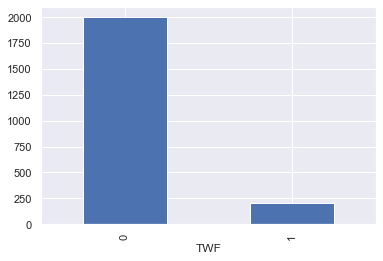

In [92]:
df_twf.groupby(label).size().plot(kind="bar")
plt.show()

In [22]:
# split train & test
train_set_twf, test_set_twf = stratified_train_test_split(df_twf, 'TWF')

In [23]:
x_train_twf, y_train_twf = split_label_and_feature(df_twf, 'TWF')
x_test_twf, y_test_twf = split_label_and_feature(df_twf, 'TWF')

In [24]:
x_train_twf.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,-1.047188,-1.009177,0.028128,0.399764,-2.285825
1,-0.995893,-0.940072,-0.816190,0.779113,-2.243375
2,-1.047188,-1.078283,-0.284801,1.115108,-2.215075
3,-0.995893,-1.009177,-0.668582,0.042093,-2.186776
4,-0.995893,-0.940072,-0.816190,0.096285,-2.158476


In [25]:
print(sum(y_train_twf)/len(y_train_twf))

0.5


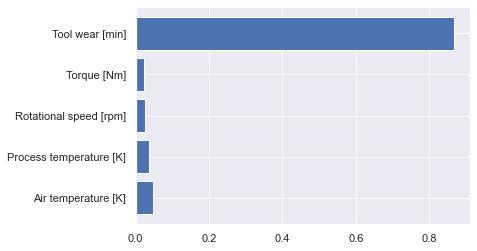

In [26]:
# Check feature importance

get_feature_importance(x_train_twf, y_train_twf)

In [27]:
# for twf we will use only Tool wear to be feature

x_train_twf = x_train_twf.drop(['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]'], axis=1)
x_test_twf = x_test_twf.drop(['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]'], axis=1)

x_train_twf.head()

,Tool wear [min]
0,-2.285825
1,-2.243375
2,-2.215075
3,-2.186776
4,-2.158476


In [28]:
# Fit model

clf_gini_twf = fit_decision_tree(x_train_twf, y_train_twf, class_weight_n=2, class_weight_p=1 )

In [29]:
# Get decision score

get_decision_score(clf_gini_twf, x_test_twf, y_test_twf)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      9934
           1       0.93      0.99      0.96      9934

    accuracy                           0.96     19868
   macro avg       0.96      0.96      0.96     19868
weighted avg       0.96      0.96      0.96     19868



In [36]:
# Test with whole data
df_mf = df.drop(['Product ID', 'Type'], axis=1)

In [427]:
x, y = split_label_and_feature(df_mf, 'TWF')

In [428]:
x = x.drop(['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]'], axis=1)

In [429]:
get_decision_score(clf_gini_twf, x, y)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      9954
           1       0.07      0.87      0.13        46

    accuracy                           0.95     10000
   macro avg       0.53      0.91      0.55     10000
weighted avg       1.00      0.95      0.97     10000



### HDF

In [30]:
label = 'HDF'
df_hdf = handle_imbalance(df, label)

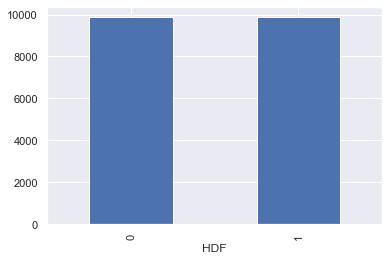

In [31]:
df_hdf.groupby('HDF').size().plot(kind="bar")
plt.show()

In [32]:
# split train & test

train_set_hdf, test_set_hdf = stratified_train_test_split(df_hdf, 'HDF')

In [33]:
# Split label & feature

x_train_hdf, y_train_hdf = split_label_and_feature(train_set_hdf, 'HDF')
x_test_hdf, y_test_hdf = split_label_and_feature(test_set_hdf, 'HDF')

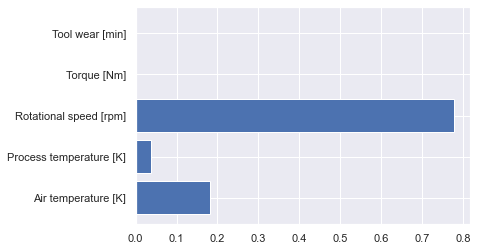

In [34]:
get_feature_importance(x_train_hdf, y_train_hdf)

In [35]:
x_test_hdf.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

In [36]:
# for hwf we will use only Rotation speed to be feature

x_train_hdf = x_train_hdf.drop(['Tool wear [min]',  'Torque [Nm]', 'Air temperature [K]',  'Process temperature [K]'], axis=1)
x_test_hdf = x_test_hdf.drop(['Tool wear [min]',  'Torque [Nm]', 'Air temperature [K]',  'Process temperature [K]'], axis=1)

x_train_hdf.head()

,Rotational speed [rpm]
0,-0.541667
1,0.615892
2,0.427028
3,-0.456373
4,-0.529482


In [37]:
# Fit model

clf_gini_hdf = fit_decision_tree(x_train_hdf, y_train_hdf)

In [38]:
# Get decision score

get_decision_score(clf_gini_hdf, x_test_hdf, y_test_hdf)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       988
           1       0.90      1.00      0.94       988

    accuracy                           0.94      1976
   macro avg       0.95      0.94      0.94      1976
weighted avg       0.95      0.94      0.94      1976



### PWF

In [39]:
label = 'PWF'
df_pwf = handle_imbalance(df, label)

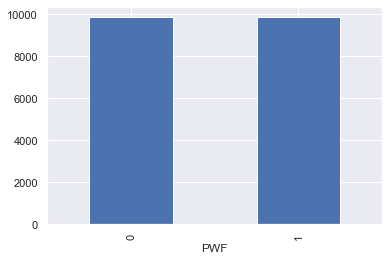

In [40]:
df_pwf.groupby('PWF').size().plot(kind="bar")
plt.show()

In [41]:
# split train & test

train_set_pwf, test_set_pwf = stratified_train_test_split(df_pwf, 'PWF')

In [42]:
# Split label & feature

x_train_pwf, y_train_pwf = split_label_and_feature(train_set_pwf, 'PWF')
x_test_pwf, y_test_pwf = split_label_and_feature(test_set_pwf, 'PWF')

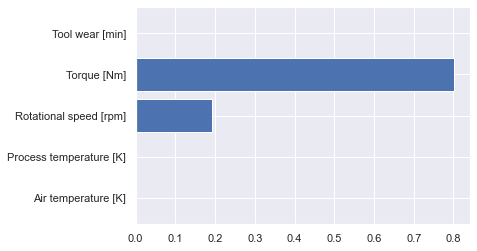

In [43]:
get_feature_importance(x_train_pwf, y_train_pwf)

In [44]:
x_test_pwf.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

In [45]:
# for hwf we will use only Rotation speed to be feature

drop_set = ['Tool wear [min]',  'Air temperature [K]',  'Process temperature [K]', 'Rotational speed [rpm]']

x_train_pwf = x_train_pwf.drop(drop_set, axis=1)
x_test_pwf = x_test_pwf.drop(drop_set, axis=1)

x_train_pwf.head()

,Torque [Nm]
0,-0.248090
1,0.320883
2,-0.020501
3,-0.742848
4,-0.668635


In [46]:
# Fit model

clf_gini_pwf = fit_decision_tree(x_train_pwf, y_train_pwf)

In [47]:
# Get decision score

get_decision_score(clf_gini_pwf, x_test_pwf, y_test_pwf)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       988
           1       0.97      0.98      0.98       987

    accuracy                           0.98      1975
   macro avg       0.98      0.98      0.98      1975
weighted avg       0.98      0.98      0.98      1975



### OSF

In [48]:
label = 'OSF'
df_osf = handle_imbalance(df, label)

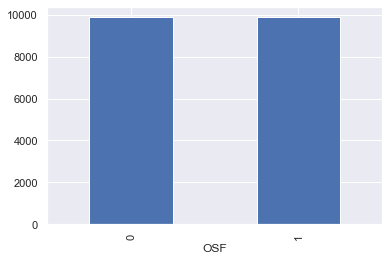

In [49]:
df_osf.groupby('OSF').size().plot(kind="bar")
plt.show()

In [50]:
# split train & test

train_set_osf, test_set_osf = stratified_train_test_split(df_osf, 'OSF')

In [51]:
# Split label & feature

x_train_osf, y_train_osf = split_label_and_feature(train_set_osf, 'OSF')
x_test_osf, y_test_osf = split_label_and_feature(test_set_osf, 'OSF')

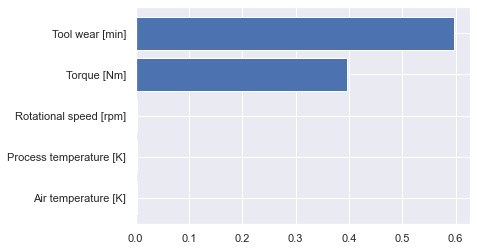

In [52]:
get_feature_importance(x_train_osf, y_train_osf)

In [53]:
x_train_osf.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

In [54]:
# for osf we will use torqu and tool wear speed to be feature

x_train_osf = x_train_osf.drop(['Rotational speed [rpm]', 'Air temperature [K]',  'Process temperature [K]'], axis=1)
x_test_osf = x_test_osf.drop(['Rotational speed [rpm]', 'Air temperature [K]',  'Process temperature [K]'], axis=1)

x_train_osf.head()

,Torque [Nm],Tool wear [min]
0,-0.118562,-1.772270
1,-1.045835,-0.637752
2,0.573337,0.644106
3,1.926629,0.290490
4,-0.159958,-0.122062


In [55]:
# Fit model

clf_gini_osf = fit_decision_tree(x_train_osf, y_train_osf)

In [56]:
# Get decision score

get_decision_score(clf_gini_osf, x_test_osf, y_test_osf)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       990
           1       0.98      0.99      0.99       990

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



### RNF

In [57]:
label = 'RNF'
df_rnf = handle_imbalance(df, label)

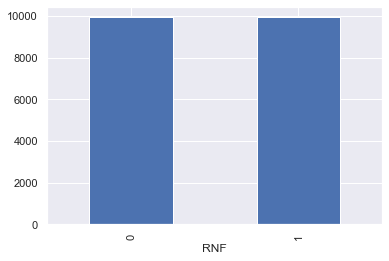

In [58]:
df_rnf.groupby('RNF').size().plot(kind="bar")
plt.show()

In [59]:
# split train & test

train_set_rnf, test_set_rnf = stratified_train_test_split(df_rnf, 'RNF')

In [60]:
# Split label & feature

x_train_rnf, y_train_rnf = split_label_and_feature(train_set_rnf, 'RNF')
x_test_rnf, y_test_rnf = split_label_and_feature(test_set_rnf, 'RNF')

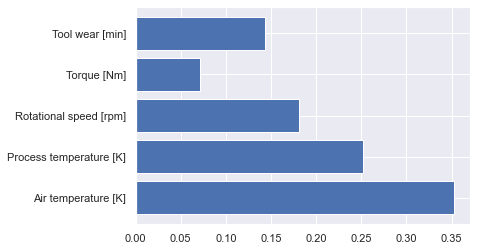

In [61]:
get_feature_importance(x_train_rnf, y_train_rnf)

In [62]:
x_train_rnf.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

In [63]:
# for osf we will use torqu and tool wear speed to be feature
# dropped_set = ['Air temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',  'Tool wear [min]', 'Process temperature [K]']

dropped_set = ['Rotational speed [rpm]', 'Torque [Nm]',  'Tool wear [min]']

x_train_rnf = x_train_rnf.drop(dropped_set, axis=1)
x_test_rnf = x_test_rnf.drop(dropped_set, axis=1)

x_train_rnf.head()

,Air temperature [K],Process temperature [K]
0,0.185897,0.206262
1,-1.742995,-1.665061
2,0.132317,0.273095
3,1.311084,0.473594
4,0.025156,-0.395235


In [64]:
# Fit model

clf_gini_rnf = fit_decision_tree(x_train_rnf, y_train_rnf)

In [65]:
# Get decision score

get_decision_score(clf_gini_rnf, x_test_rnf, y_test_rnf)

              precision    recall  f1-score   support

           0       0.83      0.46      0.59       995
           1       0.63      0.91      0.74       994

    accuracy                           0.68      1989
   macro avg       0.73      0.68      0.67      1989
weighted avg       0.73      0.68      0.67      1989



### Machine Failure

In [66]:
label = 'Machine failure'
df_mf = handle_imbalance(df, label)

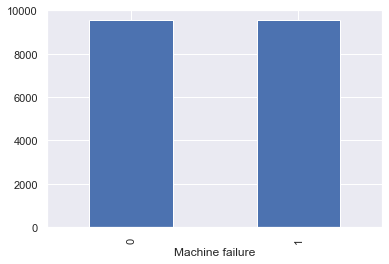

In [67]:
df_mf.groupby(label).size().plot(kind="bar")
plt.show()

In [68]:
# split train & test

train_set_mf, test_set_mf = stratified_train_test_split(df_mf, label)

In [69]:
# Split label & feature

x_train_mf, y_train_mf = split_label_and_feature(train_set_mf, label)
x_test_mf, y_test_mf = split_label_and_feature(test_set_mf, label)

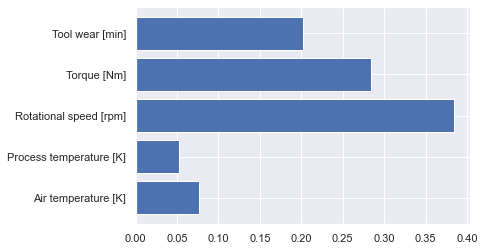

In [70]:
get_feature_importance(x_train_mf, y_train_mf)

In [71]:
x_train_mf.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

In [72]:
# for osf we will use torqu and tool wear speed to be feature
# dropped_set = ['Air temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',  'Tool wear [min]', 'Process temperature [K]']

dropped_set = ['Air temperature [K]', 'Process temperature [K]',  'Tool wear [min]']

x_train_mf = x_train_mf.drop(dropped_set, axis=1)
x_test_mf = x_test_mf.drop(dropped_set, axis=1)

x_train_mf.head()

,Rotational speed [rpm],Torque [Nm]
0,-0.500031,0.642407
1,-0.517531,0.881978
2,-0.178036,0.028050
3,-0.332034,0.395404
4,-0.342534,0.306273


In [73]:
# Fit model

clf_gini_mf = fit_decision_tree(x_train_mf, y_train_mf)

In [74]:
# Get decision score

get_decision_score(clf_gini_mf, x_test_mf, y_test_mf)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       956
           1       0.84      0.84      0.84       955

    accuracy                           0.84      1911
   macro avg       0.84      0.84      0.84      1911
weighted avg       0.84      0.84      0.84      1911



In [76]:
# Custom Ensemble Classification Model

from sklearn.base import BaseEstimator

class MachineFailureClassification(BaseEstimator):
    def __init__(self, TWF=None, HDF=None, PWF=None, OSF=None, RNF=None, MF=None):
        self.TWF = TWF
        self.HDF = HDF
        self.PWF = PWF
        self.OSF = OSF
        self.RNF = RNF
        self.MF = MF
        pass
    
    def fit(self):
        return self
    
    def predict(self, df):
        
        # ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
        
        if self.TWF is not None:
            
            threshold_twf = 0.55
            df_twf = pd.DataFrame(df['Tool wear [min]'])
            
            prob_twf = self.TWF.predict_proba(df_twf)
            df_prob_twf = pd.DataFrame(prob_twf)
            
            result_twf = df_prob_twf[1] > threshold_twf
        else:
            result_twf = 0
        
        if self.HDF is not None:
            df_hdf = pd.DataFrame(df['Rotational speed [rpm]'])
            result_hdf = self.HDF.predict(df_hdf)
        else:
            result_hdf = 0
        
        if self.PWF is not None:
            df_pwf = pd.DataFrame(df['Torque [Nm]'])
            result_pwf = self.PWF.predict(df_pwf)
        else:
            result_pwf = 0
        
        if self.OSF is not None:
            df_osf = pd.DataFrame(df[['Torque [Nm]', 'Tool wear [min]']])
            result_osf = self.OSF.predict(df_osf)
        else:
            result_osf = 0
        
        if self.RNF is not None:
            df_rnf = pd.DataFrame(df[['Air temperature [K]', 'Process temperature [K]']])
            result_rnf = self.RNF.predict(df_rnf)
        else:
            result_rnf = 0
            
        if self.MF is not None:
            df_mf = pd.DataFrame(df[['Torque [Nm]', 'Rotational speed [rpm]']])
            result_mf = self.MF.predict(df_mf)
        else:
            result_mf = 0
            
        final_result = result_twf + result_hdf + result_pwf + result_osf + result_rnf + result_mf
         
        return final_result != 0
    

In [85]:
# Create Ensemble Model From 

MFC = MachineFailureClassification(TWF=clf_gini_twf, OSF=clf_gini_osf)

### Evaluate

In [86]:
label = 'Machine failure'
df_mf = handle_imbalance(df, label)

In [87]:
df_mf = df.drop(['Product ID', 'Type'], axis=1)

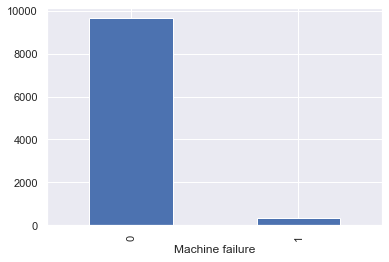

In [88]:
df_mf.groupby(label).size().plot(kind="bar")
plt.show()

In [89]:
#df_feature = df.drop(['Product ID', 'Type'], axis=1)
#df_feature.head(5)
x, y = split_label_and_feature(df_mf, 'TWF')

In [485]:
pred = MFC.predict(x)

In [486]:
sum(pred)/len(pred)

0.0578

In [90]:
get_decision_score(MFC, x, y)

              precision    recall  f1-score   support

           0       1.00      0.63      0.77      9954
           1       0.01      1.00      0.02        46

    accuracy                           0.63     10000
   macro avg       0.51      0.82      0.40     10000
weighted avg       1.00      0.63      0.77     10000



In [264]:
plot_roc_curve(pred, y.to_numpy())

/Users/watcharapongwongrattanasirikul/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [433]:
False + False

0

In [435]:
True + True

2